# The Book of Why


![image.png](img/causal_model_book.png)


<img src=img/causal_model_mount.png align = left width= 900px>


Scaling “Mount Intervention.” 

The most familiar methods to estimate the effect of an intervention, in the presence of confounders, are the back-door adjustment and instrumental variables. 

The method of front-door adjustment was unknown before the introduction of causal diagrams. 

The do-calculus makes it possible to tailor the adjustment method to any particular causal diagram. (Source: Drawing by Dakota Harr.)



## Mediator, Confounder, Collider

中介、混杂、对撞

- (a) In a chain junction, $A \rightarrow B \rightarrow C$, controlling for B prevents information about A from getting to C or vice versa.
- (b) In a fork or confounding junction, $A \leftarrow B \rightarrow C$, controlling for B prevents information about A from getting to C or vice versa.
- (c) In a collider, $A \rightarrow B \leftarrow C$, exactly the opposite rules hold. The variables A and C start out independent, so that information about A tells you nothing about C. 
    - But if you control for B, then information starts flowing through the “pipe,”  due to the explain-away effect.


(d) Controlling for descendants (or proxies) of a variable is like “partially” controlling for the variable itself. 
- Controlling for a descendant of a mediator partly closes the pipe; 
- Controlling for a descendant of a collider partly opens the pipe.


$$
A \leftarrow B \leftarrow C \rightarrow D \leftarrow E \rightarrow F \rightarrow G \leftarrow H \rightarrow I \rightarrow J
$$

If a single junction is blocked, then J cannot “find out” about A through this path.


“So we have many options to block communication between A and J: 

- control for B, control for C, don’t control for D (because it’s a collider), control for E, and so forth. 
- Any one of these is sufficient. 

**This is why the usual statistical procedure of controlling for everything that we can measure is so misguided.**
- In fact, this particular path is blocked if we don’t control for anything! 
- The colliders at D and G block the path without any outside help. 
- Controlling for D and G would open this path and enable J to listen to A.



Finally, to deconfound two variables X and Y, we need only block every noncausal path between them without blocking any causal paths. 

A **back-door path** is any path from X to Y that starts with an arrow pointing into X. 
-  it allows spurious correlation between X and Y
- X and Y will be deconfounded if we block every back-door path.

If we do this by controlling for some set of variables Z, we also need to make sure that 
- no member of Z is a descendant of X on a causal path; 
    - otherwise we might partly or completely close off that path.

Confounding was the primary obstacle that caused us to confuse seeing with doing. Having removed this obstacle with the tools of “path blocking” and the back-door criterion, we can now map the routes up **Mount Intervention** with systematic precision. 

For the novice climber, the safest routes up the mountain are 
- **the back-door adjustment**
- and its various cousins, 
    - some going under the rubric of **front-door adjustment** 
    - some under **instrumental variables**.



## THE SIMPLEST ROUTE: THE BACK-DOOR ADJUSTMENT FORMULA


### The back-door adjustment formula

$$
P(Y|do(X)) = \sum_{u} P(Y|X, U = u)P(U = u) 
$$


If you are confident that you have data on a sufficient set of variables (called **deconfounders**) to block all the back-door paths between the intervention and the outcome.

- To do this, we measure the average causal effect of an intervention by first estimating its effect at each “level,” or stratum, of the deconfounder. 
- We then compute a weighted average of those strata, where each stratum is weighted according to its prevalence in the population. 





<img src=img/causal_model_simpson2.png align = right width = 800px>

For example, the deconfounder is gender, 
we first estimate the causal effect for males and females. Then we average the two, if the population is (as usual) half male and half female. If the proportions are different—say, two-thirds male and one-third female—then to estimate the average causal effect we would take a correspondingly weighted average.

$$
P(Y|do(X)) =  P(Y|X, U = female)P(U = female) + P(Y|X, U = male)P(U = male) 
$$

## Front-door Adjustment

<img src=img/causal_model_frontdoor.png align = right width = 800px>

Suppose we are doing an observational study and have collected data on Smoking, Tar, and Cancer for each of the participants. Unfortunately, we cannot collect data on the Smoking Gene because we do not know whether such a gene exists. 
- Lacking data on the confounding variable, we cannot block the back-door path $Smoking \leftarrow Smoking \space Gene \rightarrow Cancer$. 
- Thus we cannot use **back-door adjustment** to control for the effect of the confounder.



http://bayes.cs.ucla.edu/WHY/errata-pages-PearlMackenzie_BookofWhy_Final.pdf

Instead of going in the back door, we can go in the front door! 

- In this case, the front door is the direct causal path $Smoking \rightarrow Tar \rightarrow Cancer$, for which we do have
data on all three variables.

First, we can estimate the average causal effect of Smoking on Tar
- because there is no unblocked back-door path from Smoking to Tar, as the $Smoking \leftarrow Smoking \space Gene \rightarrow Cancer \leftarrow Tar$ path is already blocked by the *collider* at Cancer. 
    - Because it is blocked already, we don’t even need back-door adjustment. 

We can simply observe $P(tar | smoking)$ and $P(tar | no \space smoking)$, and the difference between them will be the average causal effect of Smoking on Tar.

Likewise, the diagram allows us to estimate the average causal effect of **Tar on Cancer**. 
- To do this we can block the back-door path from Tar to Cancer, $Tar \leftarrow Smoking \leftarrow Smoking Gene \rightarrow  Cancer$, by adjusting for Smoking. 

We only need data on a sufficient set of deconfounders (i.e., Smoking). 

Then the back-door adjustment formula will give us $P(cancer | do(tar))$ and $P(cancer | do(no \space tar))$. 

$$
P(cancer | do(tar)) = P(cancer | tar, smoking) P(smoking) +
$$
$$
P(cancer | tar, no \space smoking)P(no \space smoking) 
$$


$$
P(cancer | do(no \space tar)) = P(cancer | no \space tar, smoking) P(smoking) +
$$
$$
P(cancer | no \space tar, no \space smoking)P(no \space smoking) 
$$


The difference between these is the average causal effect of Tar on Cancer.



We can combine $P(cancer | do (tar))$ and $P(tar|do(smoking))$ to obtain the average increase in cancer due to smoking. Cancer can come about in two ways: in the presence of Tar or in the absence of Tar. 

- If we force a person to smoke, 
    - then the probabilities of these two states are **P(tar | do(smoking))** and **P(no tar | do(no smoking))**, respectively. 
    - If a Tar state evolves, the likelihood of causing Cancer is **P(cancer | do(tar))**. 
    - If, on the other hand, a No-Tar state evolves, then it would result in a Cancer likelihood of **P(cancer | do(no tar))**. 
    - We can weight the two scenarios by their respective probabilities under do(smoking) and in this way compute the total probability of cancer due to smoking. 
- The same argument holds if we prevent a person from smoking, do(no smoking).
- The difference between the two gives us the average causal effect on cancer of smoking versus not smoking.

### The  front-door adjustment formula

$$
P(Y|do(X)) = \sum_{z} P(Z = z|X) \sum_{x} P(Y|X = x, Z = z)P(X = x)
$$

Here X stands for Smoking, Y stands for Cancer, Z stands for Tar, and U (which is conspicuously absent from the formula) stands for the unobservable variable, the Smoking Gene.

$$
P(cancer|do(smoking)) = P(tar|smoking) P(cancer|smoking, tar)P(smoking) + 
$$

$$
  P(tar|no \space smoking) P(cancer|no \space smoking, tar)P(no \space smoking) + 
$$

$$
  P(no \space tar|smoking) P(cancer|smoking, no \space tar)P(smoking) + 
$$


$$
  P(no \space tar|no \space smoking) P(cancer|no \space smoking,no \space tar)P(no \space smoking)  
$$






![image.png](img/causal_model_error.png)

![image.png](img/causal_model_do.png)

## Instrumental Variable

![image.png](img/causal_model_iv.png)

# DoWhy: Different estimation methods for causal inference

https://microsoft.github.io/dowhy/example_notebooks/dowhy_estimation_methods.html#Method-1:-Regression

This is a quick introduction to the DoWhy causal inference library.
We will load in a sample dataset and use different methods for estimating the causal effect of a (pre-specified)treatment variable on a (pre-specified) outcome variable.

We will see that not all estimators return the correct effect for this dataset.

First, let us add the required path for Python to find the DoWhy code and load all required packages

In [3]:
pip install dowhy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import logging

import dowhy
from dowhy import CausalModel
import dowhy.datasets 

Now, let us load a dataset. For simplicity, we simulate a dataset with linear relationships between common causes and treatment, and common causes and outcome. 

Beta is the true causal effect. 

In [5]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5, 
        num_instruments = 2,
        num_treatments=1,
        num_samples=10000,
        treatment_is_binary=True,
        outcome_is_binary=False)
df = data["df"]
df

Z0        Z1        W0        W1        W2        W3        W4    v0  \
0     1.0  0.194996 -0.394947  0.961946  1.432671 -0.406206 -2.281008  True   
1     1.0  0.453135  0.948574  0.127242 -0.459667 -0.783661 -1.323860  True   
2     0.0  0.064484 -0.465573  0.000664  2.157783  1.473797 -0.569321  True   
3     1.0  0.209498 -0.037355  0.318007  1.309104  3.409648 -0.872711  True   
4     0.0  0.158966 -1.778694  0.704463  1.209800  1.698519 -1.026852  True   
...   ...       ...       ...       ...       ...       ...       ...   ...   
9995  1.0  0.636827 -0.598696 -1.276830  0.848903 -0.082480 -0.016497  True   
9996  1.0  0.363879 -1.548138  1.464543  1.212518  1.530621  0.537116  True   
9997  1.0  0.975743 -1.607864  1.028439  0.618197  1.637596 -1.909433  True   
9998  0.0  0.608969 -1.051702  0.986304  0.322642  0.173046 -0.836873  True   
9999  1.0  0.149173 -0.474803  0.412599  0.670757  1.116724 -0.662707  True   

              y  
0     11.674804  
1     10.368462  
2     14.705052  
3     22.275790  
4     12.349162  
...         ...  
9995   3.033101  
9996  16.851499  
9997  13.024963  
9998  10.792296  
9999  13.718791  

[10000 rows x 9 columns]

In [17]:
df.columns

Index(['Z0', 'Z1', 'W0', 'W1', 'W2', 'W3', 'W4', 'v0', 'y', 'propensity_score',
       'strata', 'dbar', 'd_y', 'dbar_y', 'ps', 'ips_weight', 'tips_weight',
       'cips_weight', 'ips_normalized_weight', 'tips_normalized_weight',
       'cips_normalized_weight', 'ips_stabilized_weight',
       'tips_stabilized_weight', 'cips_stabilized_weight'],
      dtype='object')

Note that we are using a pandas dataframe to load the data.

## Simple Multiple Regression

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [21]:
results = smf.ols('y ~ v0+ Z0 + Z1 + W0+W1 + W2 + W3+W4', data=df).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.173e+08
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:59:58   Log-Likelihood:                 31888.
No. Observations:               10000   AIC:                        -6.376e+04
Df Residuals:                    9991   BIC:                        -6.369e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0002      0.000     -0.457      0.647      -0.001       0.001
v0[T.True]     9.9999      0.000   2.72e+04      0.000       9.999      10.001
Z0             0.0004      0.000      1.809      0.070   -3.24e-05       0.001
Z1             0.0004      0.000      1.104      0.270      -0.000       0.001
W0             3.6089   9.95e-05   3.63e+04      0.000       3.609       3.609
W1             4.2723      0.000   4.07e+04      0.000       4.272       4.273
W2             1.0764      0.000   1.02e+04      0.000       1.076       1.077
W3             2.9752      0.000   2.84e+04      0.000       2.975       2.975
W4             0.5833      0.000   5581.928      0.000       0.583       0.584
==============================================================================
Omnibus:                        0.593   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.606
Skew:                          -0.018   Prob(JB):                        0.739
Kurtosis:                       2.989   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Identifying the causal estimand

We now input a causal graph in the DOT graph format.

In [6]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"],
        instruments=data["instrument_names"]
        )

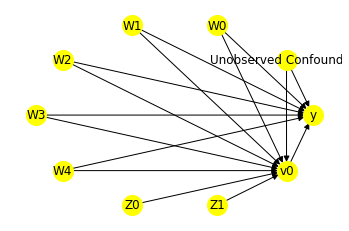

In [7]:
model.view_model()

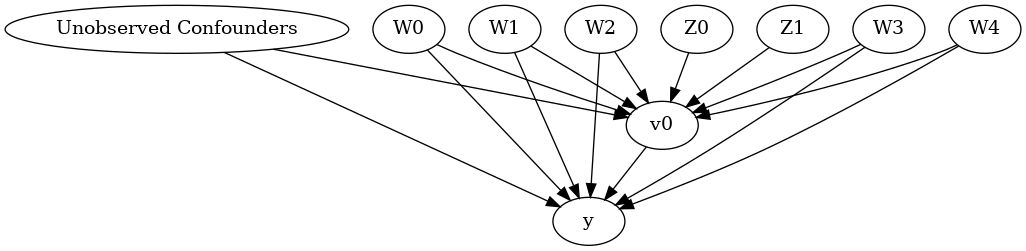

In [9]:
from IPython.display import Image, display
display(Image(filename="img/causal_model.png"))

We get a causal graph. Now identification and estimation is done. 

In [10]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W4,W2,W1,W0,W3))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W4,W2,W1,W0,W3,U) = P(y|v0,W4,W2,W1,W0,W3)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z1, Z0])*Derivative([v0], [Z1, Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable found!



## Method 1: Regression

Use linear regression.

In [11]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W4,W2,W1,W0,W3))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W4,W2,W1,W0,W3,U) = P(y|v0,W4,W2,W1,W0,W3)

## Realized estimand
b: y~v0+W4+W2+W1+W0+W3
Target units: ate

## Estimate
Mean value: 10.000215167302395
p-value: [0.]

Causal Estimate is 10.000215167302395


## Method 2: Stratification

We will be using propensity scores to stratify units in the data.

In [12]:
causal_estimate_strat = model.estimate_effect(identified_estimand,
                                              method_name="backdoor.propensity_score_stratification",
                                              target_units="att")
print(causal_estimate_strat)
print("Causal Estimate is " + str(causal_estimate_strat.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W4,W2,W1,W0,W3))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W4,W2,W1,W0,W3,U) = P(y|v0,W4,W2,W1,W0,W3)

## Realized estimand
b: y~v0+W4+W2+W1+W0+W3
Target units: att

## Estimate
Mean value: 10.11255355637429

Causal Estimate is 10.11255355637429


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]


## Method 3: Matching

We will be using propensity scores to match units in the data.

In [13]:
causal_estimate_match = model.estimate_effect(identified_estimand,
                                              method_name="backdoor.propensity_score_matching",
                                              target_units="atc")
print(causal_estimate_match)
print("Causal Estimate is " + str(causal_estimate_match.value))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W4,W2,W1,W0,W3))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W4,W2,W1,W0,W3,U) = P(y|v0,W4,W2,W1,W0,W3)

## Realized estimand
b: y~v0+W4+W2+W1+W0+W3
Target units: atc

## Estimate
Mean value: 10.252860488929832

Causal Estimate is 10.252860488929832


## Method 4: Weighting

We will be using (inverse) propensity scores to assign weights to units in the data. DoWhy supports a few different weighting schemes:
1. Vanilla Inverse Propensity Score weighting (IPS) (weighting_scheme="ips_weight")
2. Self-normalized IPS weighting (also known as the Hajek estimator) (weighting_scheme="ips_normalized_weight")
3. Stabilized IPS weighting (weighting_scheme = "ips_stabilized_weight")

In [14]:
causal_estimate_ipw = model.estimate_effect(identified_estimand,
                                            method_name="backdoor.propensity_score_weighting",
                                            target_units = "ate",
                                            method_params={"weighting_scheme":"ips_weight"})
print(causal_estimate_ipw)
print("Causal Estimate is " + str(causal_estimate_ipw.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W4,W2,W1,W0,W3))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W4,W2,W1,W0,W3,U) = P(y|v0,W4,W2,W1,W0,W3)

## Realized estimand
b: y~v0+W4+W2+W1+W0+W3
Target units: ate

## Estimate
Mean value: 12.331475267230175

Causal Estimate is 12.331475267230175


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Method 5: Instrumental Variable

We will be using the Wald estimator for the provided instrumental variable.

In [15]:
causal_estimate_iv = model.estimate_effect(identified_estimand,
        method_name="iv.instrumental_variable", method_params = {'iv_instrument_name': 'Z0'})
print(causal_estimate_iv)
print("Causal Estimate is " + str(causal_estimate_iv.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z1, Z0])*Derivative([v0], [Z1, Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

## Realized estimand
Realized estimand: Wald Estimator
Realized estimand type: nonparametric-ate
Estimand expression:
                                                              -1
Expectation(Derivative(y, Z0))⋅Expectation(Derivative(v0, Z0))  
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)
Estimand assumption 3, treatment_effect_homogeneity: Each unit's treatment ['v0'] is affected in the same way by common causes of ['v0'] and y
Estimand assumption 4, outcome_effect_homogeneity: Each unit's outcome y is affected in the same way by common c

## Method 6: Regression Discontinuity

We will be internally converting this to an equivalent instrumental variables problem.

In [16]:
causal_estimate_regdist = model.estimate_effect(identified_estimand,
        method_name="iv.regression_discontinuity", 
        method_params={'rd_variable_name':'Z1',
                       'rd_threshold_value':0.5,
                       'rd_bandwidth': 0.1})
print(causal_estimate_regdist)
print("Causal Estimate is " + str(causal_estimate_regdist.value))

      local_rd_variable  local_treatment  local_outcome
1              0.453135             True      10.368462
6              0.439823            False     -10.037854
8              0.576257             True      11.544652
12             0.598853             True      17.126834
20             0.436545             True      15.086424
...                 ...              ...            ...
9979           0.499215             True       8.946704
9984           0.420970             True       4.681815
9988           0.424770             True       4.736566
9989           0.599859             True       9.418337
9990           0.412721             True      -0.181307

[2050 rows x 3 columns]
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z1, Z0])*Derivative([v0], [Z1, Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusi